In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/wage.csv')

In [4]:
df.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [4]:
df.columns

Index(['Unnamed: 0', 'year', 'age', 'sex', 'maritl', 'race', 'education',
       'region', 'jobclass', 'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

In [5]:
df.describe()[['age', 'wage']]

,age,wage
count,3000.000000,3000.000000
mean,42.414667,111.703608
std,11.542406,41.728595
min,18.000000,20.085537
25%,33.750000,85.383940
50%,42.000000,104.921507
75%,51.000000,128.680488
max,80.000000,318.342430


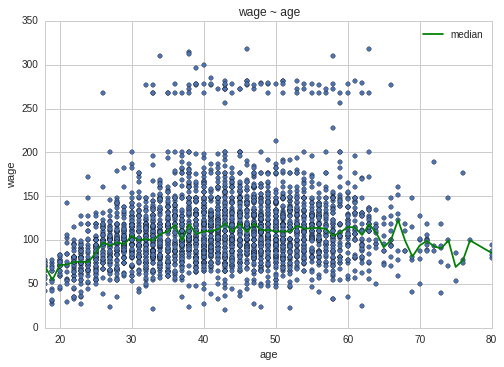

In [8]:
fig, ax = plt.subplots()
df.plot.scatter(x='age', y='wage', title='wage ~ age', ax=ax)
median_wage = df.groupby('age')['wage'].agg(np.median)
median_wage.plot.line(label='median', color='green')
ax.legend()

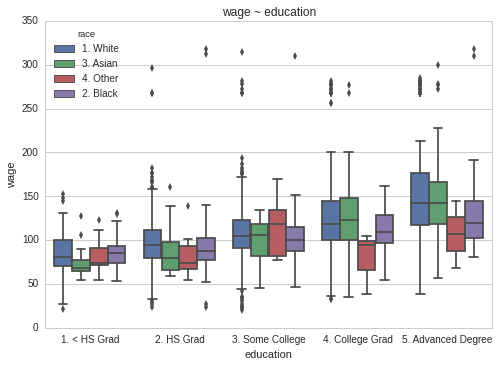

In [9]:
fig, ax = plt.subplots()
sns.boxplot(y='wage', x='education', hue='race', data=df, ax=ax,
            order=sorted(df['education'].unique(), key=lambda x: x[0]))
ax.set_title('wage ~ education')

In [10]:
df.groupby(['education', 'race'])['wage'].agg(np.median)

education           race    
1. < HS Grad        1. White     81.283253
                    2. Black     85.383940
                    3. Asian     68.748088
                    4. Other     73.775743
2. HS Grad          1. White     94.072715
                    2. Black     87.981033
                    3. Asian     79.854900
                    4. Other     73.775743
3. Some College     1. White    104.921507
                    2. Black     99.689464
                    3. Asian    105.903197
                    4. Other    118.015588
4. College Grad     1. White    118.884359
                    2. Black    109.354256
                    3. Asian    123.089700
                    4. Other     94.072715
5. Advanced Degree  1. White    141.775172
                    2. Black    119.740851
                    3. Asian    141.775172
                    4. Other    106.945844
Name: wage, dtype: float64